In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras import regularizers

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AMIT_AI/KAGGLE/DATA_SET/fraud-detection/creditcard.csv')

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df['Class'].value_counts()

,count
Class,
0,284315
1,492


In [ ]:
x = df.drop(columns=['Class'])
y = df['Class']

In [ ]:
legit = df[df['Class']==0]
fraud = df[df['Class']==1]

In [ ]:
from sklearn.model_selection import train_test_split
x_legit_train, x_legit_test = train_test_split(legit.drop(columns=['Class']), test_size=0.2, random_state=42)

In [ ]:
x_test = pd.concat([x_legit_test, fraud.drop(columns=['Class'])])
y_test = pd.concat([legit.loc[x_legit_test.index, 'Class'], fraud['Class']])

### Scale the features

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

x_ligit_train_scaled = scaler.fit_transform(x_legit_train)
x_test_scaled = scaler.transform(x_test)

## AutoEncoder

In [ ]:
x_ligit_train_scaled.shape

(227452, 30)

In [ ]:
encoding_dim = 5

# Input layer
input_dim = Input(shape=(x_ligit_train_scaled.shape[1],))

# Encoder:
encoded = Dense(20, activation='relu')(input_dim)
encoded = Dense(10, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)

# Decoder:
decoded = Dense(10, activation='relu')(encoded)
decoded = Dense(20, activation='relu')(decoded)
decoded = Dense(x_ligit_train_scaled.shape[1], activation='sigmoid')(decoded)

# Define the autoencoder model
autoencoder = Model(input_dim, decoded)

# Define the encoder model
encoder = Model(input_dim, encoded)

# Define the decoder model
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-3](encoded_input)
decoder_layer = autoencoder.layers[-2](decoder_layer)
decoder_layer = autoencoder.layers[-1](decoder_layer)

# Compile the autoencoder model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

### Train autoencoder

In [ ]:
history = autoencoder.fit(x_ligit_train_scaled, x_ligit_train_scaled,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_scaled, x_test_scaled))

Epoch 1/20
889/889 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0132 - val_loss: 0.0039
Epoch 2/20
889/889 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0025 - val_loss: 0.0024
Epoch 3/20
889/889 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0021 - val_loss: 0.0023
Epoch 4/20
889/889 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0021 - val_loss: 0.0022
Epoch 5/20
889/889 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0020 - val_loss: 0.0022
Epoch 6/20
889/889 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0019 - val_loss: 0.0021
Epoch 7/20
889/889 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0018 - val_loss: 0.0020
Epoch 8/20
889/889 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0017 - val_loss: 0.0019
Epoch 9/20
889/889 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0016 - val_loss: 0.0019
Epoch 10/20
889/889 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0016 - val_loss: 0.0018
Epoch 11/20
889/889 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0016 - val_loss: 0.0018
Epoch 12/20
889/889 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step

### Plot training and testing loss

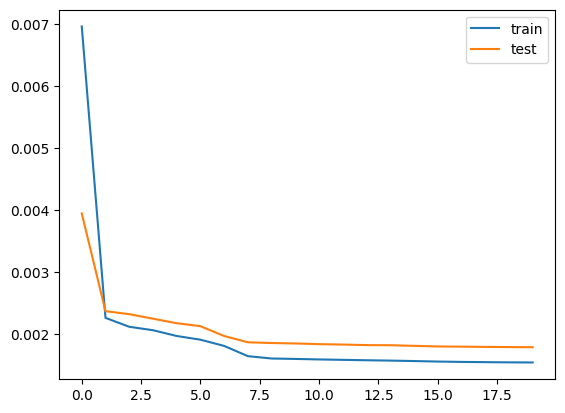

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()